### https://keras.io/api/applications/

### Download Flowers dataset¶

In [1]:
# #You can download the data manually as well instead of using 'wget'
# !wget http://download.tensorflow.org/example_images/flower_photos.tgz --quiet

In [2]:
!ls -la flower_photos.tgz

-rw-r--r--@ 1 vidyadharbendre  staff  228813984 Feb 11  2016 flower_photos.tgz


In [3]:
!ls -l

total 772328
-rw-rw-r--@  1 vidyadharbendre  staff      33661 Mar 23 12:45 1a. Classification_MNIST_CNN_Keras.ipynb
-rw-r--r--@  1 vidyadharbendre  staff      80103 Mar 23 13:07 1b. Classification_MNIST_CNN_Keras_Functional.ipynb
-rw-rw-r--@  1 vidyadharbendre  staff    1269188 Mar 22 21:07 2a. Visualize an Image.ipynb
-rw-------@  1 vidyadharbendre  staff      54372 Mar 23 11:07 2b. Image_Classification_CNN.ipynb
-rw-rw-r--@  1 vidyadharbendre  staff      39149 Mar 23 10:15 2c. Image Classification - Flowers.ipynb
-rw-rw-r--@  1 vidyadharbendre  staff    3803839 Mar 23 11:26 3a. Image Augmentation.ipynb
-rw-rw-r--@  1 vidyadharbendre  staff     798909 Mar 24 21:32 3b. Image Classification - Flowers with Augmentation.ipynb
-rw-rw-r--@  1 vidyadharbendre  staff     889157 Mar 25 00:20 5a_Image_Classification_Flower_Transfer_Learning.ipynb
-rw-r--r--@  1 vidyadharbendre  staff       9872 Mar 23 11:24 abc_new.jpg
drwxr-xr-x@  5 vidyadharbendre  staff        160 Mar 22 20:54 check_point_fo

In [4]:
# #Unzip the data
# !tar -xf flower_photos.tgz

In [5]:
# read dataset
import tarfile
dataset = tarfile.open('flower_photos.tgz')
dataset

In [6]:
dataset.getnames()

['flower_photos',
 'flower_photos/roses',
 'flower_photos/roses/14810868100_87eb739f26_m.jpg',
 'flower_photos/roses/1446090416_f0cad5fde4.jpg',
 'flower_photos/roses/15319767030_e6c5602a77_m.jpg',
 'flower_photos/roses/15032112248_30c5284e54_n.jpg',
 'flower_photos/roses/7211616670_2d49ecb3a5_m.jpg',
 'flower_photos/roses/15674450867_0ced942941_n.jpg',
 'flower_photos/roses/17158274118_00ec99a23c.jpg',
 'flower_photos/roses/14019883858_e5d2a0ec10_n.jpg',
 'flower_photos/roses/8035908422_87220425d2_n.jpg',
 'flower_photos/roses/14747962886_2bff6bb323_m.jpg',
 'flower_photos/roses/4356781875_92c5cd93c0.jpg',
 'flower_photos/roses/8524505546_b242bd4928_n.jpg',
 'flower_photos/roses/9406573080_60eab9278e_n.jpg',
 'flower_photos/roses/6039330368_c30ed224c4_m.jpg',
 'flower_photos/roses/14414100710_753a36fce9.jpg',
 'flower_photos/roses/3292434691_392071d702_n.jpg',
 'flower_photos/roses/5273722065_c85d8543c2_m.jpg',
 'flower_photos/roses/2215318403_06eb99176a.jpg',
 'flower_photos/roses/17

In [7]:
# We will build pandas dataset
import pandas as pd

df = pd.DataFrame(columns=['class', 'image_file'])

In [8]:
# run through tarfile members

for name in dataset.getnames():
    tar_mem = dataset.getmember(name)

    #check if it is a file
    if (tar_mem.isfile() and name.endswith('.jpg')):
        # Build Directory and class info
        im_dir = name[0:name.rfind('/')]
        im_class = im_dir[im_dir.rfind('/')+1:]
        # Add record to the datafram
        df.loc[df.shape[0]] = [im_class, name]                                        

In [9]:
im_dir

'flower_photos/dandelion'

In [10]:
im_class

'dandelion'

In [11]:
df.sample(n=10)

,class,image_file
3096,dandelion,flower_photos/dandelion/5109501167_2d9bbb0f27_...
644,sunflowers,flower_photos/sunflowers/5007598545_90e08e81c1...
32,roses,flower_photos/roses/9404876600_04f6d37685.jpg
1287,sunflowers,flower_photos/sunflowers/18237156988_9ceb46a8d...
2060,tulips,flower_photos/tulips/8712244311_da8e90bf8e_n.jpg
179,roses,flower_photos/roses/4754734410_94d98463a5.jpg
932,sunflowers,flower_photos/sunflowers/21821266773_7113d34c3...
50,roses,flower_photos/roses/15901230359_1819e96b89_n.jpg
1507,tulips,flower_photos/tulips/4550091966_7f3e0f8802_n.jpg
2826,dandelion,flower_photos/dandelion/6994938270_bf51d0fe63.jpg


## Creating training and testing dataset

In [12]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [13]:
train_df.to_csv('flower_photos/train.csv', index=False)
test_df.to_csv('flower_photos/test.csv', index=False)

## Read training and test data

In [14]:
# read training and testing data

train_df = pd.read_csv('flower_photos/train.csv')
test_df = pd.read_csv('flower_photos/test.csv')

In [15]:
train_df.shape, test_df.shape

((2936, 2), (734, 2))

## Check Contents

In [16]:
train_df.sample(n=5)

,class,image_file
1841,sunflowers,flower_photos/sunflowers/5027895361_ace3b731e5...
1128,tulips,flower_photos/tulips/38287568_627de6ca20.jpg
2890,roses,flower_photos/roses/5050969148_a0090f762a.jpg
1056,sunflowers,flower_photos/sunflowers/1008566138_6927679c8a...
503,dandelion,flower_photos/dandelion/6888894675_524a6accab_...


In [17]:
# get class names

class_names = train_df['class'].unique().tolist()
print('Flower classes: ', class_names)


Flower classes:  ['tulips', 'daisy', 'sunflowers', 'dandelion', 'roses']


# Build Batch Generator

In [18]:
import tensorflow as tf
import numpy as np

In [19]:
# Define some parameters

img_size = 224
img_depth = 3

### Function to normalize image according to model being used

In [20]:
def normalize_data(img):
    # Normalize ResNet50
    return tf.keras.applications.resnet50.preprocess_input(img)

Create an ImageDataGenerator object, it can also split data between train and test.

In [21]:
# Define train data generator with data augmentation
train_datagen= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True,
                                                               preprocessing_function=normalize_data)

# Define test data generator with no augmentation
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=normalize_data)

In [22]:
train_df.columns

Index(['class', 'image_file'], dtype='object')

In [23]:
train_df.head(2)

,class,image_file
0,tulips,flower_photos/tulips/3502685880_f026400dce_n.jpg
1,daisy,flower_photos/daisy/16025261368_911703a536_n.jpg


In [24]:
img_size

224

In [63]:
# Training (from datafram)

train_generator = train_datagen.flow_from_dataframe(train_df, 
                                                       x_col = 'image_file', # file path 
                                                       y_col = 'class', # Class for the image
                                                       target_size = (img_size, img_size), # Image resize information
                                                       batch_size = 64)


Found 2936 validated image filenames belonging to 5 classes.


In [64]:
# Testing (from datafram)

test_generator = train_datagen.flow_from_dataframe(test_df, 
                                                       x_col = 'image_file', # file path 
                                                       y_col = 'class', # Class for the image
                                                       target_size = (img_size, img_size), # Image resize information
                                                       batch_size = 64)

Found 734 validated image filenames belonging to 5 classes.


ImageDataGenerator returns 64 images and their labels

In [65]:
#Lets check the features (images) and Labels (flower class) returned by ImageDataGenerator
X, y = next(training_generator)

print('Input features shape', X.shape)
print('Actual labels shape', y.shape)

Input features shape (64, 224, 224, 3)
Actual labels shape (64, 5)


## Load Pre-Trained Model

In [66]:
tf.keras.backend.clear_session()
model = tf.keras.applications.ResNet50(include_top=False,
                                       weights='imagenet',
                                       input_shape=(img_size, img_size, 3))

In [67]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [68]:
model.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

# Freeze the layers in pre-trained model

In [69]:
#model.layers
len(model.layers)

175

In [70]:
#Set pre-trained model layers to not trainable

for layer in model.layers:
    layer.trainable = False


In [71]:
# Check if layer is frozen or not

model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

# Add fully connected layer for new classes

In [72]:
model.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [73]:
# get output layer of pre-trained model
x1 = model.output
x1

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [74]:
# Global Average Pool to reduce the number of features and Flatten the output
x2 = tf.keras.layers.GlobalAveragePooling2D()(x1)

In [75]:
# output shape of the global average pooling layer
x2

<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'global_average_pooling2d')>

In [76]:
# add output layer

prediction = tf.keras.layers.Dense(len(class_names), activation='softmax') (x2)

prediction


<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dense')>

# Building Final Model for Classification

In [77]:
# Using Keras Model class

final_model = tf.keras.models.Model(inputs = model.input, # pre-trained model input as input layer
                                   outputs = prediction) # output layer added


In [78]:
# Compile the model

final_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])



In [79]:
# How does the overall summary looks like
final_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

### Train the model

In [80]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('flowers_resnet.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [81]:
final_model.fit(train_generator,
          epochs=5,
          steps_per_epoch= 2939//64,  #Number of training images//batch_size
          validation_data=test_generator,
          validation_steps = 731//64, #Number of test images//batch_size
          callbacks = [model_checkpoint])

Epoch 1/5


2024-03-25 01:28:48.044803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - ETA: 0s - loss: 0.7535 - accuracy: 0.7166

2024-03-25 01:29:04.598548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.83665, saving model to flowers_resnet.h5
45/45 [==============================] - 22s 459ms/step - loss: 0.7535 - accuracy: 0.7166 - val_loss: 0.4644 - val_accuracy: 0.8366
Epoch 2/5
45/45 [==============================] - ETA: 0s - loss: 0.3665 - accuracy: 0.8719
Epoch 2: val_accuracy improved from 0.83665 to 0.88636, saving model to flowers_resnet.h5
45/45 [==============================] - 20s 438ms/step - loss: 0.3665 - accuracy: 0.8719 - val_loss: 0.3579 - val_accuracy: 0.8864
Epoch 3/5
45/45 [==============================] - ETA: 0s - loss: 0.3092 - accuracy: 0.8935
Epoch 3: val_accuracy did not improve from 0.88636
45/45 [==============================] - 19s 430ms/step - loss: 0.3092 - accuracy: 0.8935 - val_loss: 0.3197 - val_accuracy: 0.8849
Epoch 4/5
45/45 [==============================] - ETA: 0s - loss: 0.2713 - accuracy: 0.9060
Epoch 4: val_accuracy improved from 0.88636 to 0.89915, saving model to flowers_resnet.h5
45/45 

In [84]:
final_model.fit(train_generator,
          epochs=15,
          initial_epoch = 5,  
          steps_per_epoch= 2939//64,  #Number of training images//batch_size
          validation_data=test_generator,
          validation_steps = 731//64, #Number of test images//batch_size
          callbacks = [model_checkpoint])

Epoch 6/15
45/45 [==============================] - ETA: 0s - loss: 0.2133 - accuracy: 0.9311
Epoch 6: val_accuracy did not improve from 0.90483
45/45 [==============================] - 20s 445ms/step - loss: 0.2133 - accuracy: 0.9311 - val_loss: 0.3077 - val_accuracy: 0.8878
Epoch 7/15
45/45 [==============================] - ETA: 0s - loss: 0.1988 - accuracy: 0.9352
Epoch 7: val_accuracy did not improve from 0.90483
45/45 [==============================] - 20s 436ms/step - loss: 0.1988 - accuracy: 0.9352 - val_loss: 0.2553 - val_accuracy: 0.9048
Epoch 8/15
45/45 [==============================] - ETA: 0s - loss: 0.1792 - accuracy: 0.9424
Epoch 8: val_accuracy did not improve from 0.90483
45/45 [==============================] - 20s 440ms/step - loss: 0.1792 - accuracy: 0.9424 - val_loss: 0.2638 - val_accuracy: 0.9048
Epoch 9/15
45/45 [==============================] - ETA: 0s - loss: 0.1572 - accuracy: 0.9488
Epoch 9: val_accuracy did not improve from 0.90483
45/45 [=================

In [85]:
!ls flower_photos/tulips/

100930342_92e8746431_n.jpg   3238068295_b2a7b17f48_n.jpg
10094729603_eeca3f2cb6.jpg   3253320570_b617f7fd4b.jpg
10094731133_94a942463c.jpg   3254533919_cb0b8af26c.jpg
10128546863_8de70c610d.jpg   3282751630_45c2665034_m.jpg
10163955604_ae0b830975_n.jpg 3396033831_bb88d93630.jpg
10164073235_f29931d91e.jpg   3404038663_f62cf8eba3_n.jpg
10686568196_b1915544a8.jpg   3421027755_cdb8fef8e8_n.jpg
107693873_86021ac4ea_n.jpg   3422915985_9bf7264d36.jpg
10791227_7168491604.jpg      3430229687_32645b5738.jpg
10995953955_089572caf0.jpg   3433265727_0b8022e091.jpg
110147301_ad921e2828.jpg     3446285408_4be9c0fded_m.jpg
112334842_3ecf7585dd.jpg     3447650747_8299786b80_n.jpg
112428665_d8f3632f36_n.jpg   3449794006_8c289840aa.jpg
112428919_f0c5ad7d9d_n.jpg   3454461550_64d6e726bf_m.jpg
112650879_82adc2cc04_n.jpg   3455026124_d66cafb9fc.jpg
112651128_7b5d39a346_m.jpg   3457017604_90e4de7480_m.jpg
112951022_4892b1348b_n.jpg   3459922572_bc8516b5fe_m.jpg
112951086_150a59d499_n.jpg   3474066174_8d3b3e8

In [86]:
img = tf.keras.preprocessing.image.load_img('flower_photos/tulips/9976515506_d496c5e72c.jpg')

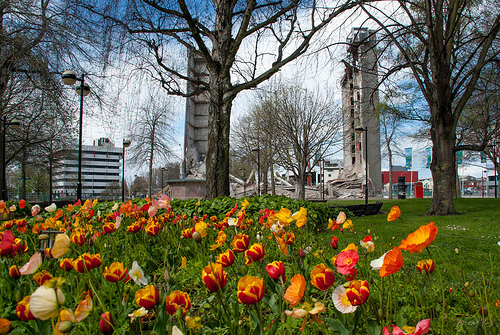

In [87]:
img

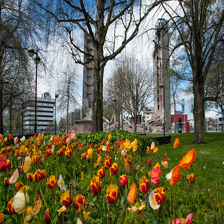

In [88]:
img_resize = img.resize((img_size,img_size))
img_resize

In [91]:
#Numpy array
img_array = tf.keras.preprocessing.image.img_to_array(img_resize)

In [92]:
img_array.shape

(224, 224, 3)

In [94]:
final_model.predict(img_array)

ValueError: in user code:

    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


In [95]:
final_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [96]:
tf.expand_dims(img_array, axis=0).shape

TensorShape([1, 224, 224, 3])

In [98]:
final_model.output

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dense')>

In [99]:
prediction = final_model.predict(tf.expand_dims(img_array, axis=0))

2024-03-25 01:40:23.174438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step


In [100]:
tf.argmax(prediction[0])

<tf.Tensor: shape=(), dtype=int64, numpy=4>

In [101]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

# Unfreeze some of the trained layers in ResNet

In [103]:
print(len(model.layers))

175


In [104]:
# unfreezing the all the layers after layer #

for layer in model.layers[170: ]:
    layer.trainable = True
    
    

In [105]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [106]:
# Let us train for 10 steps:

final_model.fit(train_generator,
          epochs=5,
          steps_per_epoch= 2939//64,  #Number of training images//batch_size
          validation_data=test_generator,
          validation_steps = 731//64, #Number of test images//batch_size
          callbacks = [model_checkpoint])


Epoch 1/5
45/45 [==============================] - ETA: 0s - loss: 0.1102 - accuracy: 0.9655
Epoch 1: val_accuracy did not improve from 0.91619
45/45 [==============================] - 19s 430ms/step - loss: 0.1102 - accuracy: 0.9655 - val_loss: 0.2520 - val_accuracy: 0.9020
Epoch 2/5
45/45 [==============================] - ETA: 0s - loss: 0.1066 - accuracy: 0.9711
Epoch 2: val_accuracy did not improve from 0.91619
45/45 [==============================] - 19s 426ms/step - loss: 0.1066 - accuracy: 0.9711 - val_loss: 0.2485 - val_accuracy: 0.9077
Epoch 3/5
45/45 [==============================] - ETA: 0s - loss: 0.1071 - accuracy: 0.9655
Epoch 3: val_accuracy did not improve from 0.91619
45/45 [==============================] - 19s 429ms/step - loss: 0.1071 - accuracy: 0.9655 - val_loss: 0.2486 - val_accuracy: 0.9148
Epoch 4/5
45/45 [==============================] - ETA: 0s - loss: 0.0988 - accuracy: 0.9718
Epoch 4: val_accuracy did not improve from 0.91619
45/45 [=====================

In [108]:
# Let us train for 10 steps:

final_model.fit(train_generator,
          epochs=10,
          initial_epoch=5,
          steps_per_epoch= 2939//64,  #Number of training images//batch_size
          validation_data=test_generator,
          validation_steps = 731//64, #Number of test images//batch_size
          callbacks = [model_checkpoint])

Epoch 6/10
45/45 [==============================] - ETA: 0s - loss: 0.0915 - accuracy: 0.9742
Epoch 6: val_accuracy did not improve from 0.91619
45/45 [==============================] - 20s 436ms/step - loss: 0.0915 - accuracy: 0.9742 - val_loss: 0.2555 - val_accuracy: 0.9077
Epoch 7/10
45/45 [==============================] - ETA: 0s - loss: 0.0882 - accuracy: 0.9756
Epoch 7: val_accuracy did not improve from 0.91619
45/45 [==============================] - 19s 429ms/step - loss: 0.0882 - accuracy: 0.9756 - val_loss: 0.2543 - val_accuracy: 0.9077
Epoch 8/10
45/45 [==============================] - ETA: 0s - loss: 0.0869 - accuracy: 0.9760
Epoch 8: val_accuracy improved from 0.91619 to 0.92045, saving model to flowers_resnet.h5
45/45 [==============================] - 20s 440ms/step - loss: 0.0869 - accuracy: 0.9760 - val_loss: 0.2121 - val_accuracy: 0.9205
Epoch 9/10
45/45 [==============================] - ETA: 0s - loss: 0.0836 - accuracy: 0.9760
Epoch 9: val_accuracy improved from 

In [109]:
# Model Prediction

In [110]:
ls -la flower_photos/daisy/

total 69592
drwx------@ 635 vidyadharbendre  staff   20320 Feb 11  2016 ./
drwxr-x---@  10 vidyadharbendre  staff     320 Mar 24 22:43 ../
-rw-r-----@   1 vidyadharbendre  staff   26797 Jan 11  2016 100080576_f52e8ee070_n.jpg
-rw-r-----@   1 vidyadharbendre  staff  117247 Jan 11  2016 10140303196_b88d3d6cec.jpg
-rw-r-----@   1 vidyadharbendre  staff   36410 Jan 11  2016 10172379554_b296050f82_n.jpg
-rw-r-----@   1 vidyadharbendre  staff  102862 Jan 11  2016 10172567486_2748826a8b.jpg
-rw-r-----@   1 vidyadharbendre  staff   27419 Jan 11  2016 10172636503_21bededa75_n.jpg
-rw-r-----@   1 vidyadharbendre  staff  132803 Jan 11  2016 102841525_bd6628ae3c.jpg
-rw-r-----@   1 vidyadharbendre  staff  102618 Jan 11  2016 1031799732_e7f4008c03.jpg
-rw-r-----@   1 vidyadharbendre  staff   51688 Jan 11  2016 10391248763_1d16681106_n.jpg
-rw-r-----@   1 vidyadharbendre  staff   13946 Jan 11  2016 10437754174_22ec990b77_m.jpg
-rw-r-----@   1 vidyadharbendre  staff   13518 Jan 11  2016 10437770546_8

In [121]:
img = tf.keras.preprocessing.image.load_img('flower_photos/daisy/1031799732_e7f4008c03.jpg', target_size=(img_size, img_size))

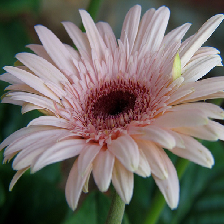

In [122]:
img

In [123]:
# convert into numpy array

img_array = tf.keras.preprocessing.image.img_to_array(img)


In [124]:
# Normalize it

img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

In [125]:
img_array.shape

(224, 224, 3)

In [126]:
final_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [127]:
# Make it is a batch
img_array = tf.expand_dims(img_array, axis=0)
img_array.shape

TensorShape([1, 224, 224, 3])

In [128]:
# Predict
preds = final_model.predict(img_array)
preds

1/1 [==============================] - 0s 46ms/step


array([[9.9673212e-01, 1.9935456e-03, 1.1326283e-03, 2.9626563e-05,
        1.1217518e-04]], dtype=float32)

In [129]:
#class index with highest probability

tf.argmax(preds[0]).numpy()

0

In [130]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}